In [41]:
import tensorflow as tf
import numpy as np
import cv2
import os
from tqdm import tqdm
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [42]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import pandas as pd

In [43]:
from os import listdir
from os.path import isfile, join

In [44]:
#!git clone https://github.com/Marinku099/Sci-project-m5.git

In [45]:
# not sure the real size
width = 450
hieght = 550

In [46]:
df = pd.read_excel(r"data\cdi-data-scan1266.xlsx")
df = df[["ID","Pt","DEP","Age","Sex"]] #1 = depressed

In [47]:
df

,ID,Pt,DEP,Age,Sex
0,1,8,1,13,0
1,2,15,0,12,0
2,3,8,1,12,1
3,4,13,1,13,1
4,5,15,0,12,0
...,...,...,...,...,...
473,543,23,0,15,0
474,544,6,1,15,1
475,545,28,0,15,0
476,546,13,1,11,1


In [48]:
def labelfeatures(ID):
    i = df['Pt'][df['ID']==ID].index
    # score = df.loc[0, "Pt"]
    score = df.loc[i[0], ["Pt","Age","Sex"]]
    score.to_numpy()
    return score

In [49]:
def labelY(ID):
    i = df['DEP'][df['ID']==ID].index
    # score = df.loc[0, "Pt"]
    y = df.loc[i[0], "DEP"]
    return y

In [50]:
def img2data(path):
  img_data = []
  IDs = []
  features = []
  Y = []

  for folder in os.listdir(path):
    folder_path = os.path.join(path, folder)
    for item in tqdm(os.listdir(folder_path)):
      filePath = os.path.join(folder_path, item)

      # print(item)
      ID = int(item.split('.')[0])
      IDs.append(ID)
      features.append(labelfeatures(ID))
      Y.append(labelY(ID))

      img = cv2.imread(filePath, cv2.IMREAD_GRAYSCALE)
      # plt.imshow(img)

      img = cv2.resize(img , (width, hieght))
      # img.append(score)

      img_data.append(img)

  return img_data, IDs, features, Y

In [51]:
img, img_name, features, Y = img2data(r"data_label")
# print(img)

img = np.asarray(img)

flattened_images = img.reshape(img.shape[0], -1)

100%|██████████| 267/267 [00:01<00:00, 222.01it/s]


In [52]:
# analyze with score feature
images_score = np.column_stack((flattened_images, features))

In [53]:
# analyze with score, age, sex
images_score = np.column_stack((flattened_images, features))

In [54]:
# analyze with images only
#images_score = flattened_images

In [55]:
images_score

array([[ 0,  0,  0, ..., 15, 12,  0],
       [ 0,  0,  0, ..., 15, 12,  0],
       [ 0,  0,  0, ..., 38, 13,  0],
       ...,
       [ 0,  0,  0, ...,  3, 14,  1],
       [86,  4,  2, ...,  6, 15,  1],
       [ 0,  0,  0, ..., 13, 11,  1]], dtype=int64)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(images_score, Y, test_size=0.20, random_state=42)

In [ ]:
import plotly.express as px
err=[]
for k in range(2,30):
  print('k =',k)
  kmeans=KMeans(k,n_init='auto')
  kmeans.fit(X)
  err.append(km.inertia_)

px.line(x=[k for k in range(2,30)],y=err)

In [57]:
k = 2
kmeans = KMeans(k, random_state = 40)
kmeans.fit(X_train)

C:\Users\Computer\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=40)

In [58]:
features = np.asarray(features)
features[:, 2]

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [70]:
image_cluster = pd.DataFrame(img_name, columns=['image'])

len(kmeans.labels_)

470

In [66]:

image_cluster["cluster"] = kmeans.labels_
#image_cluster["cdi_score"] = features[:, 0]
#image_cluster["age"] = features[:, 1]
#image_cluster["sex"] = features[:, 2]
image_cluster

ValueError: Length of values (376) does not match length of index (470)

In [71]:
def labelClass(ID):
    
    i = df['DEP'][df['ID']==ID].index
    score = df.loc[i[0], 'DEP']
    return score

def clusterClass(ID):
    i = image_cluster['clusterid'][image_cluster['image']==ID].index
    # print(i)
    score = image_cluster.loc[i[0], 'clusterid']
    return score

In [72]:
T=0
F=0
for i in image_cluster["image"]:
    if (labelClass(i) == clusterClass(i)):
        T+=1
    else:
        F+=1

print(f"True result {T} , Bad result {F}")

KeyError: 'clusterid'

In [95]:
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [77]:
Ypred = kmeans.predict(X_test)

In [107]:
adjusted_mutual_info_score(y_test, Ypred)

-0.006734945572891912

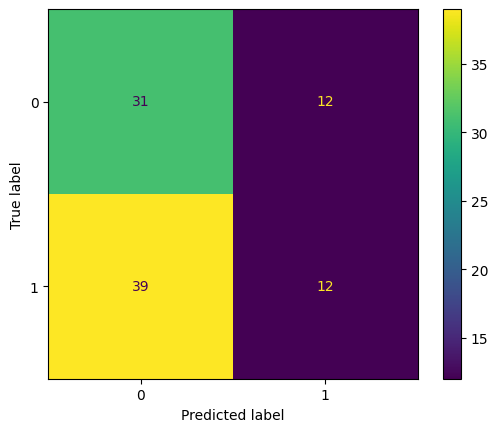

In [105]:
cm = confusion_matrix(y_test, Ypred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [108]:
f1_score(y_test, Ypred)

0.31999999999999995

In [106]:
len(y_test)

94

In [89]:
train_acc = kmeans.score(X_train, y_train)
test_acc = kmeans.score(X_test, y_test)
test_acc

-19132615974.79973

In [90]:
#Importing required modules
 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,

In [ ]:
plt.scatter()

In [91]:
data = load_digits().
pca = PCA(2)

In [ ]:
left = [1, 2]
count = []

for cluster in image_cluster["clusterid"].unique():
    print(cluster)
    count.append(image_cluster["clusterid"].value_counts()[cluster])

count

1
0


[430, 40]

<BarContainer object of 2 artists>

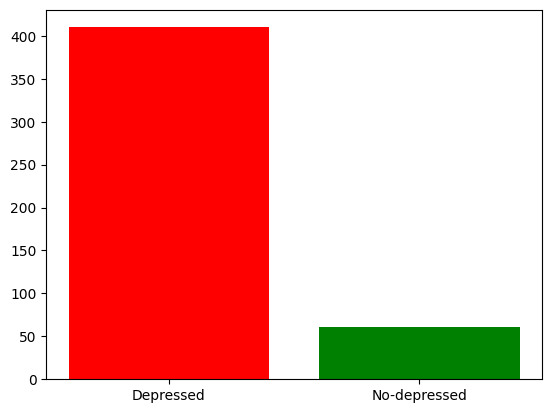

In [ ]:
plt.bar(left, count, tick_label = ["Depressed", "No-depressed"],
        width = 0.8, color = ['red', 'green'])